In [103]:
#extract the numpy arrays as csv files
import numpy as np
import matplotlib.pyplot as plt
#V1 = np.loadtxt('/home/sumanth/Alpha Rhythm Generation/postmidsem/Data/0.008_10_VN1_01.csv',dtype = float)
#V2 = np.loadtxt('/home/sumanth/Alpha Rhythm Generation/postmidsem/Data/0.008_10_VN2_01.csv', dtype= float)
#t  = np.loadtxt('/home/sumanth/Alpha Rhythm Generation/postmidsem/Data/0.008_10_Time_01.csv', dtype= float)
print(plt.rcParams.keys())

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [145]:
#extracting from param, method was a bit different
import numpy as np
import matplotlib.pyplot as plt
z = np.loadtxt('E:/IISER/Project/Data/Param Data/Data_0.06_10.csv',dtype = float)
#V2 = np.loadtxt('E:/IISER/Project/Data/Old Data/0.0_1_VN2_4.csv', dtype= float)
#t  = np.loadtxt('E:/IISER/Project/Data/Old Data/0.0_1_Time_4.csv', dtype= float)
V1 =z[1,:]
V2 =z[2,:]
t =z[0,:]

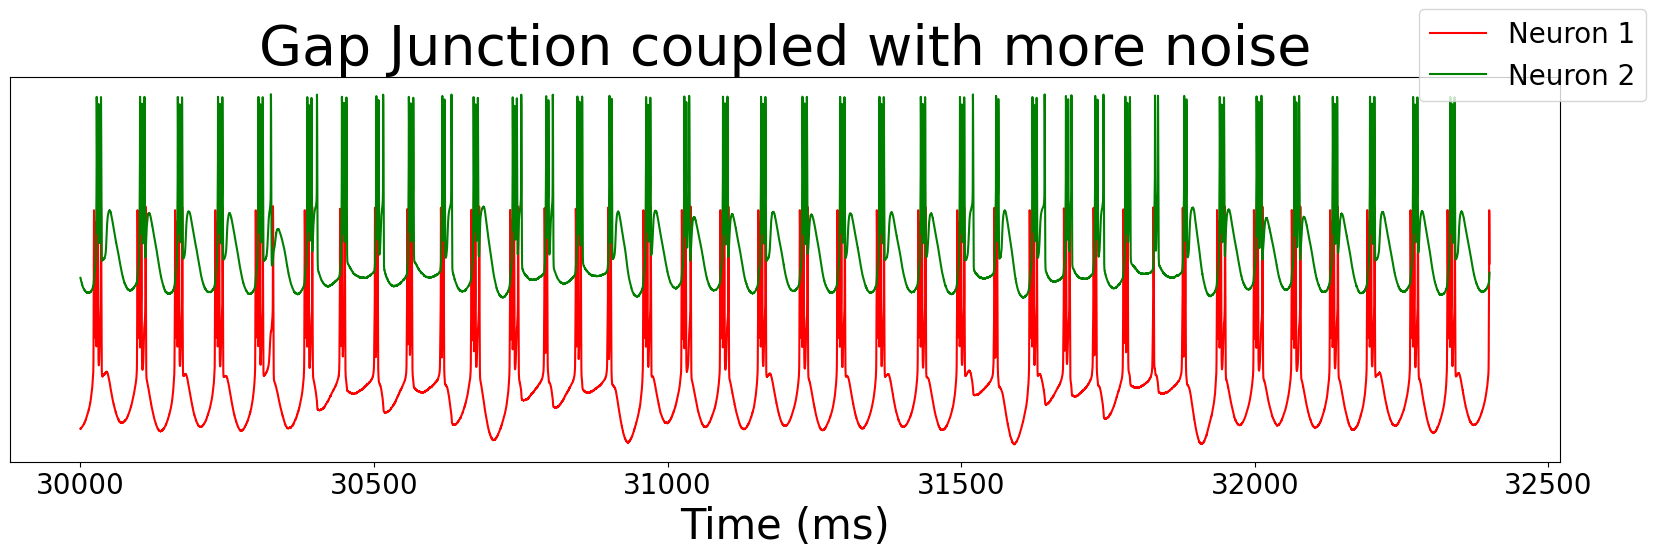

In [146]:
import matplotlib.pyplot as plt
V3=V2+65
plt.figure(figsize=(20,5))
plt.xlabel("Time (ms)", fontsize = 30)
plt.ylabel("Voltage (mV)", fontsize = 30)
plt.title("Gap Junction coupled with more noise", fontsize = 40)
plt.plot(t[3000000:3240000],V1[3000000:3240000],c="red")
plt.plot(t[3000000:3240000],V3[3000000:3240000], c="green")
plt.legend(["Neuron 1", "Neuron 2"],prop = {"size":20},bbox_to_anchor=(0.90, 0.90))
#plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

In [147]:
#the spike train is then windowed into a gaussian curve, where the peak is at each burst and the trough is at the non-spiking region
#the signal convolution prevents any kind of noise generated by the signal at smaller timescales that are not in our roi
y1 = V1
y2 = V2


In [148]:
#the spike train is then windowed into a gaussian curve, where the peak is at each burst and the trough is at the non-spiking region
#the signal convolution prevents any kind of noise generated by the signal at smaller timescales that are not in our roi
y1 = V1
y2 = V2


Text(0.5, 1.0, 'Baseline corrected convolved signal')

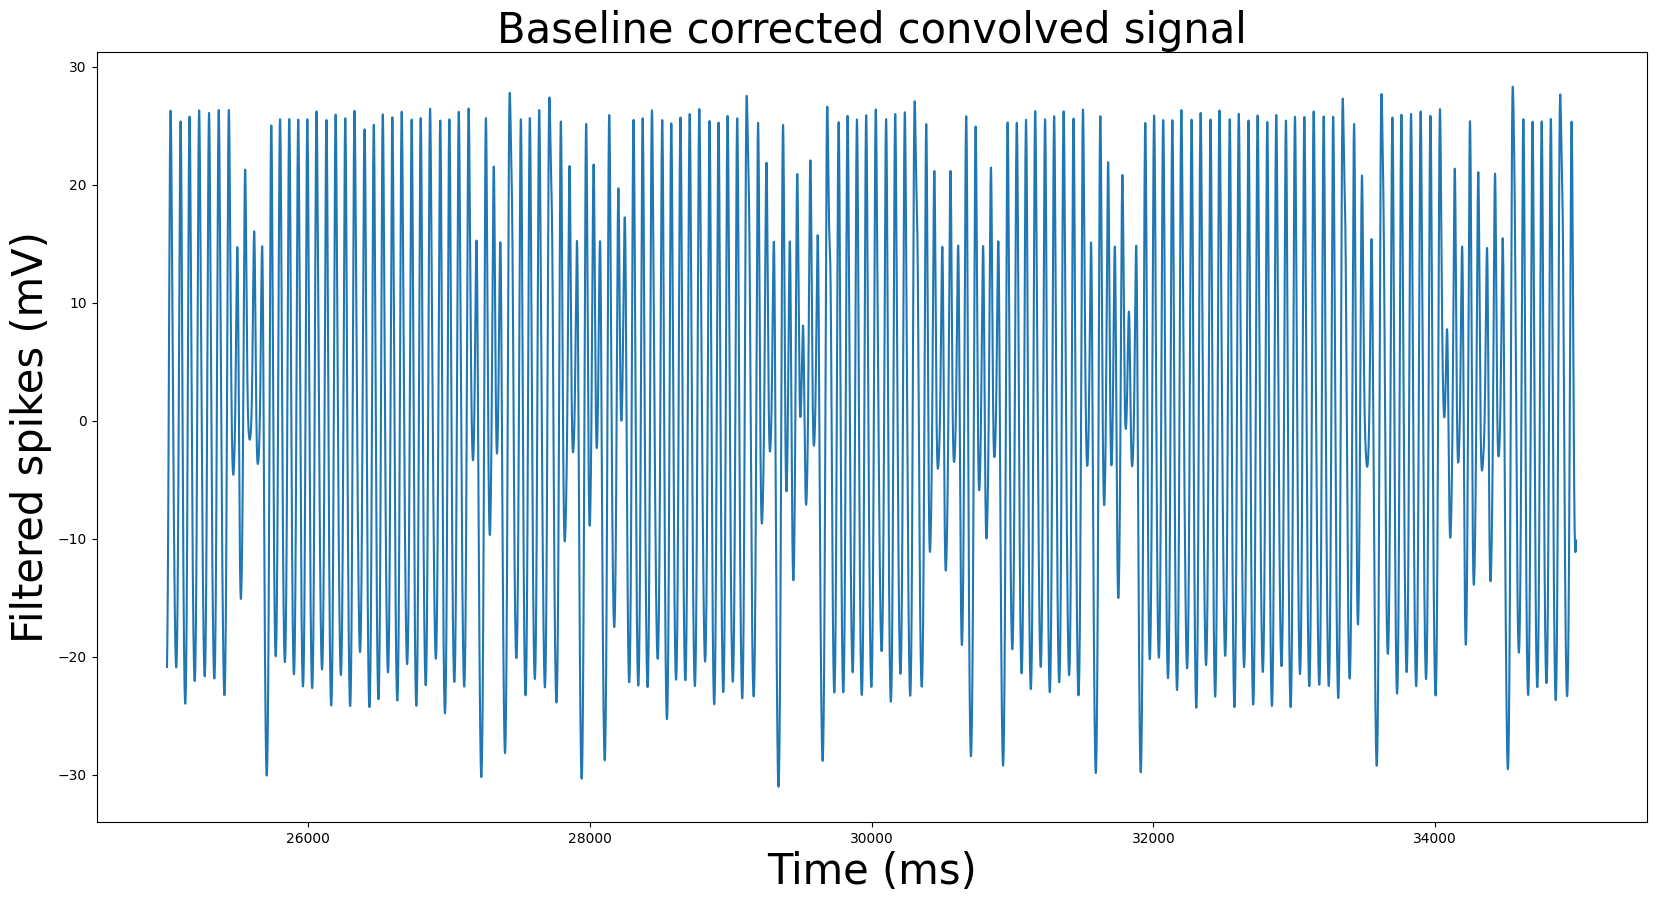

In [149]:
from scipy import signal
win = signal.windows.gaussian(len(y1),800)
filter = signal.convolve(y1, win, mode='same') / sum(win)
filtered = filter - np.mean(filter)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(t[2500000:3500000],filtered[2500000:3500000])
plt.xlabel("Time (ms)", fontsize = 30)
plt.ylabel("Filtered spikes (mV)", fontsize=30)
plt.title("Baseline corrected convolved signal", fontsize = 30)

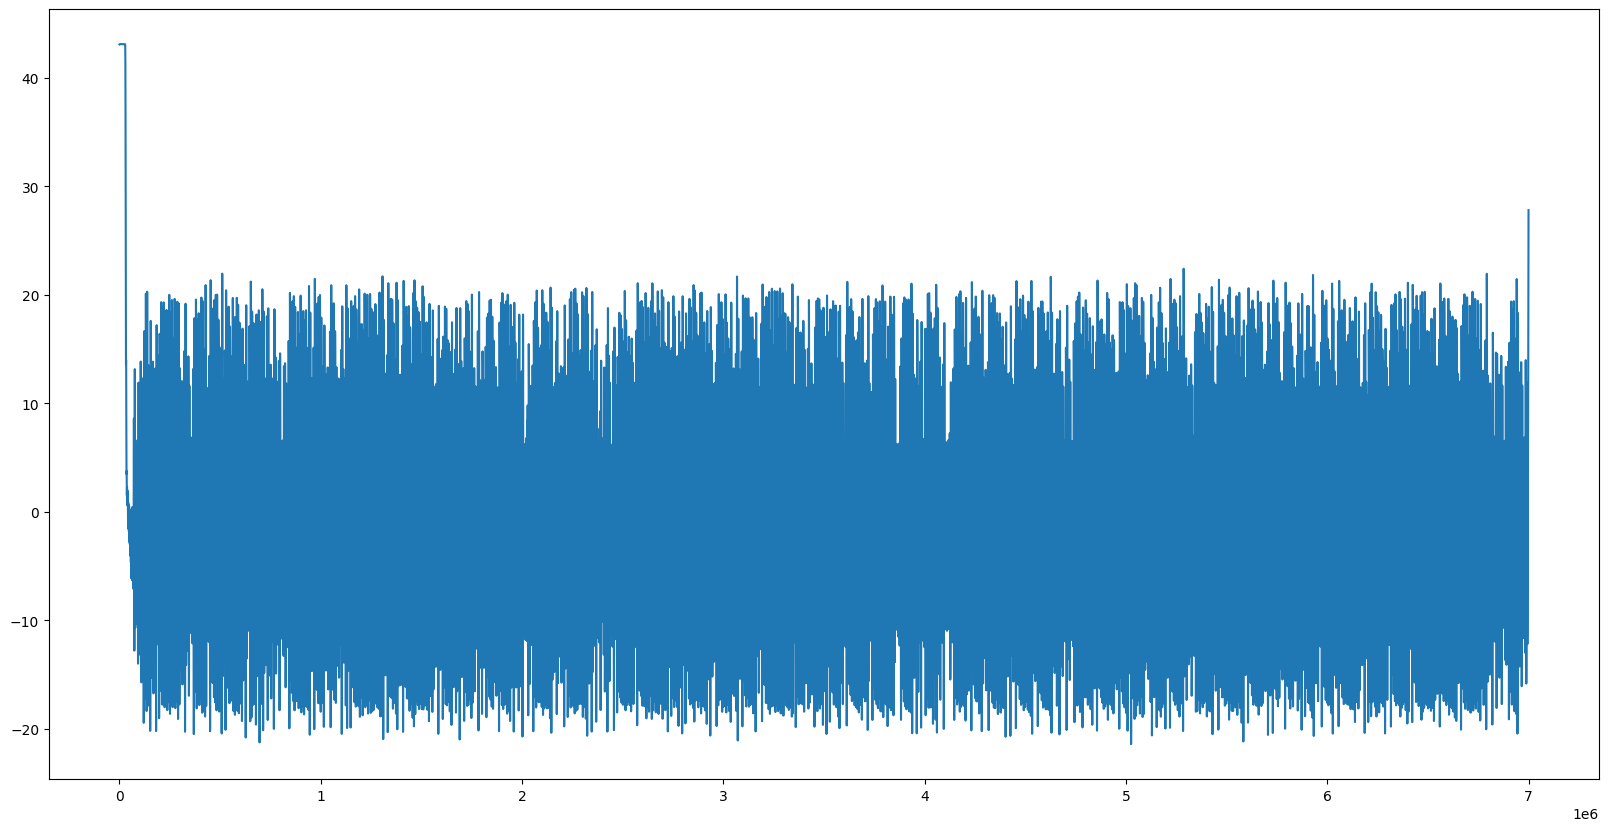

In [150]:
from scipy import signal
win2 = signal.windows.gaussian(len(y2),800)
filter2 = signal.convolve(y2, win2, mode='same') / sum(win2)
filtered2 = filter2 - np.mean(filter2)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(filtered2)

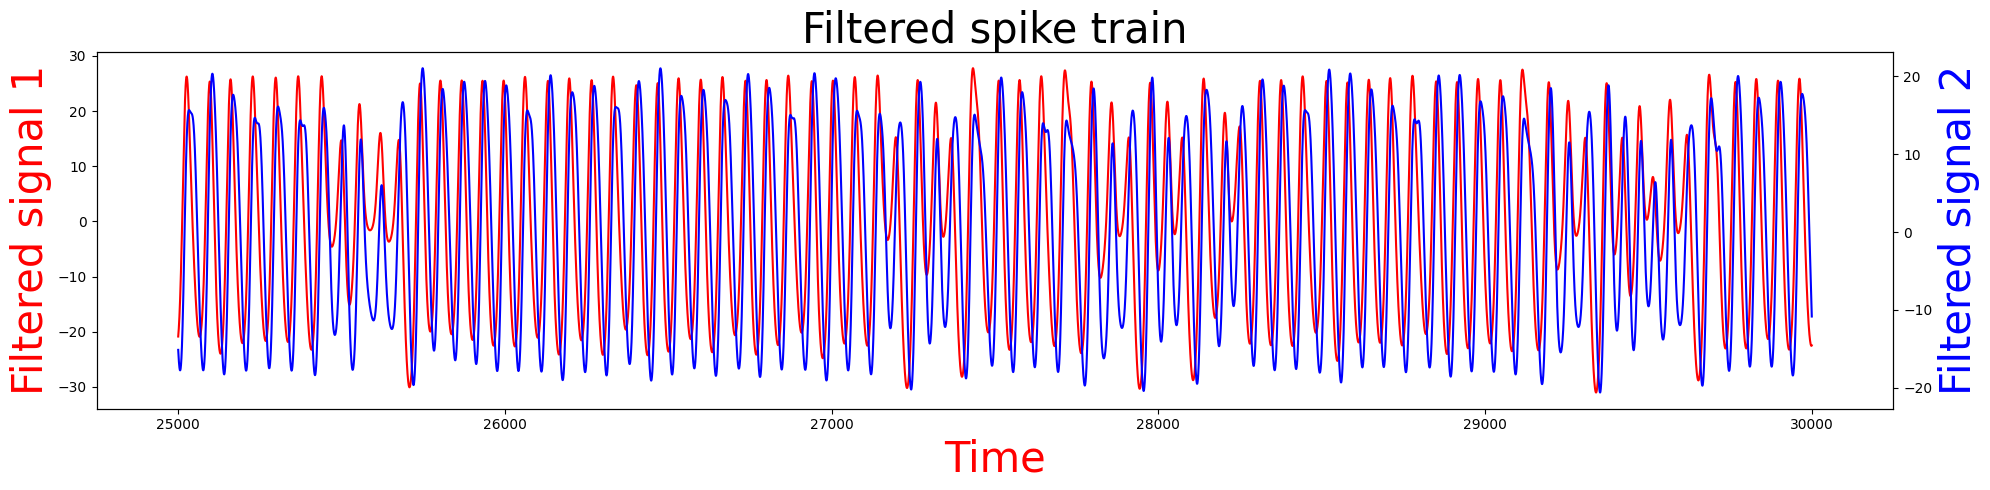

In [151]:
#Remove the initial noisy data of 1.5s after which the steady state behavior is observed 
time = t[1500000:6500000]
# y-axis values
xy1 = filtered[1500000:6500000]
 
# secondary y-axis values
xy2 = filtered2[1500000:6500000]
 
# plotting figures by creating aexs object
# using subplots() function
fig, ax = plt.subplots(figsize = (20, 5))
plt.title('Filtered spike train',fontsize = 30)
 
# using the twinx() for creating another
# axes object for secondary y-Axis

ax.plot(time[1000000:1500000], xy1[1000000:1500000], color = 'r')
ax2 = ax.twinx()
ax2.plot(time[1000000:1500000], xy2[1000000:1500000], color = 'b')
 
# giving labels to the axises
ax.set_xlabel('Time', color = 'r',fontsize = 30)
ax.set_ylabel('Filtered signal 1', color = 'r',fontsize =30)
 
# secondary y-axis label
ax2.set_ylabel('Filtered signal 2', color = 'b',fontsize = 30)
 
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


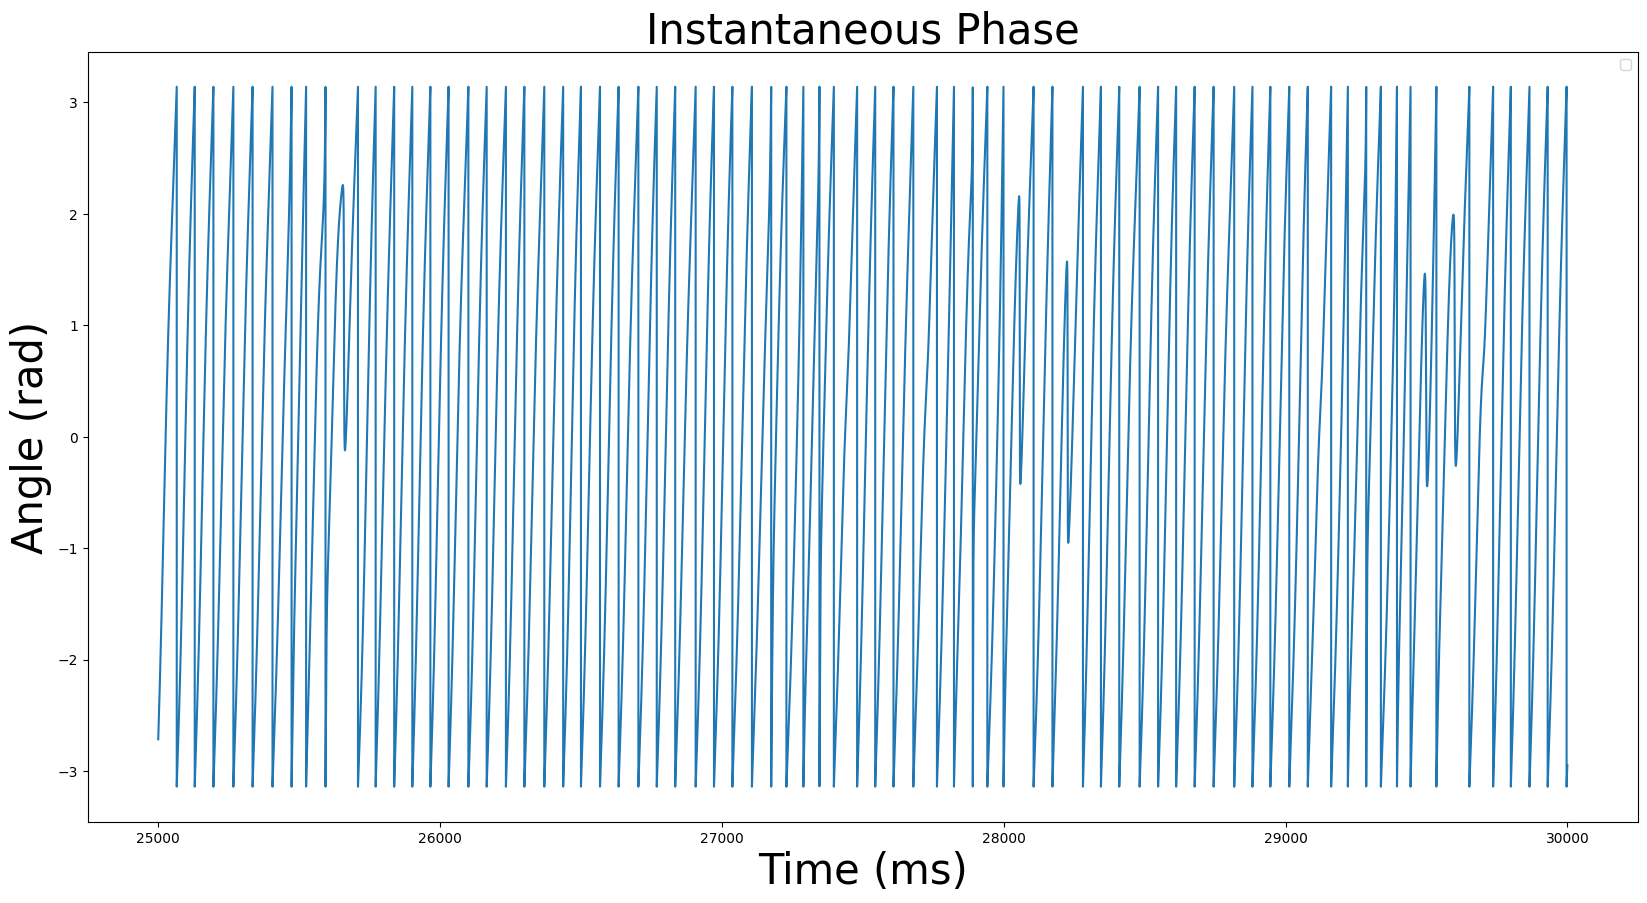

In [152]:
#We have a gaussian curve, converting their analytical signal into instantaneous phases
from scipy.signal import hilbert

phase=[[],[]]
phase[0]=np.angle(hilbert(xy1))
phase[1]=np.angle(hilbert(xy2))

plt.figure(figsize=(20,10))
#plt.plot(xy1)
plt.plot(time[1000000:1500000],phase[0][1000000:1500000])
#plt.plot(time[1000000:1500000], phase[1][1000000:1500000])
plt.title("Instantaneous Phase",fontsize= 30)
plt.xlabel("Time (ms)", fontsize = 30)
plt.ylabel("Angle (rad)", fontsize = 30)
plt.legend()

Text(0.5, 0, 'Time (ms)')

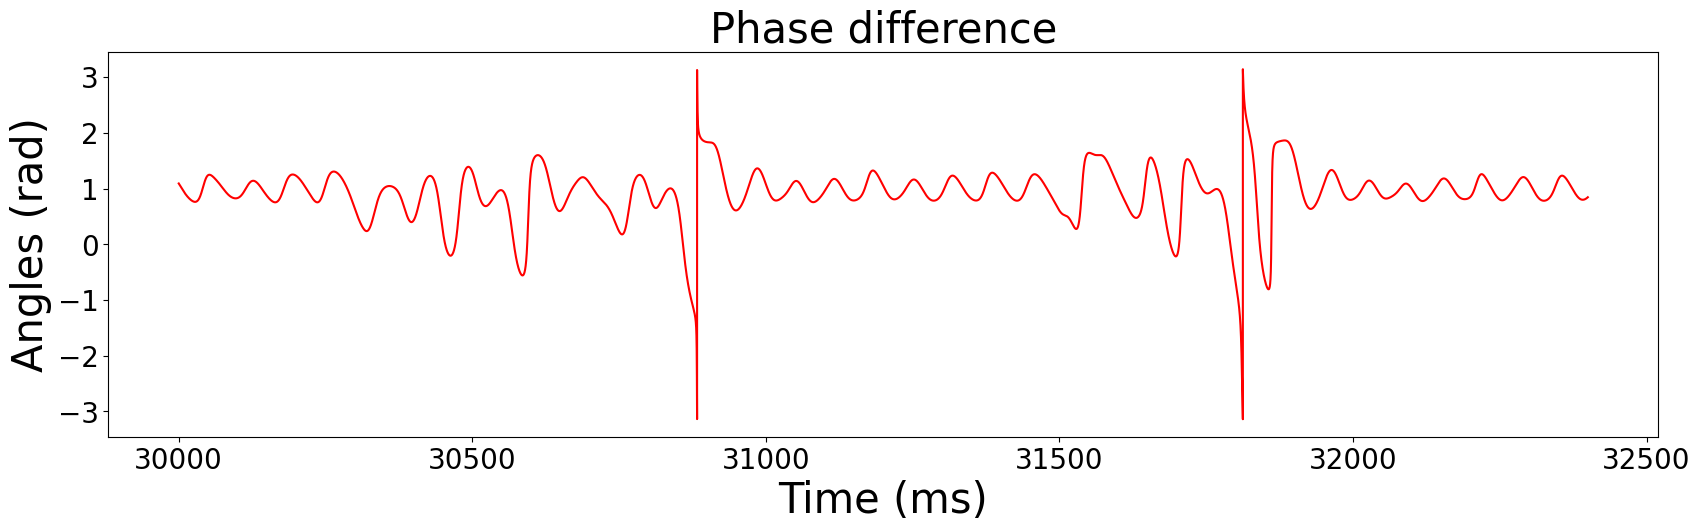

In [153]:
phase_difference = []
phase_difference = phase[0]-phase[1]
for i in range(len(phase_difference)):
    if phase_difference[i]>np.pi:
        phase_difference[i]-=2*np.pi
    elif phase_difference[i]< -np.pi:
        phase_difference[i]+=2*np.pi
plt.figure(figsize=(20,5))
plt.plot(time[1500000:1740000],phase_difference[1500000:1740000], c="red")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Angles (rad)",fontsize = 30)
plt.title("Phase difference", fontsize =30)
plt.xlabel("Time (ms)", fontsize =30)

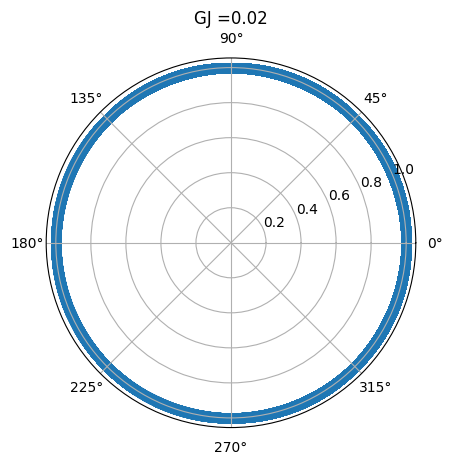

In [154]:
theta = phase[0] - phase[1]
r = np.ones(len(theta))
fig,ax =plt.subplots(subplot_kw = {'projection':'polar'})
ax.scatter(theta,r)
ax.set_title("GJ =0.02")
plt.show()

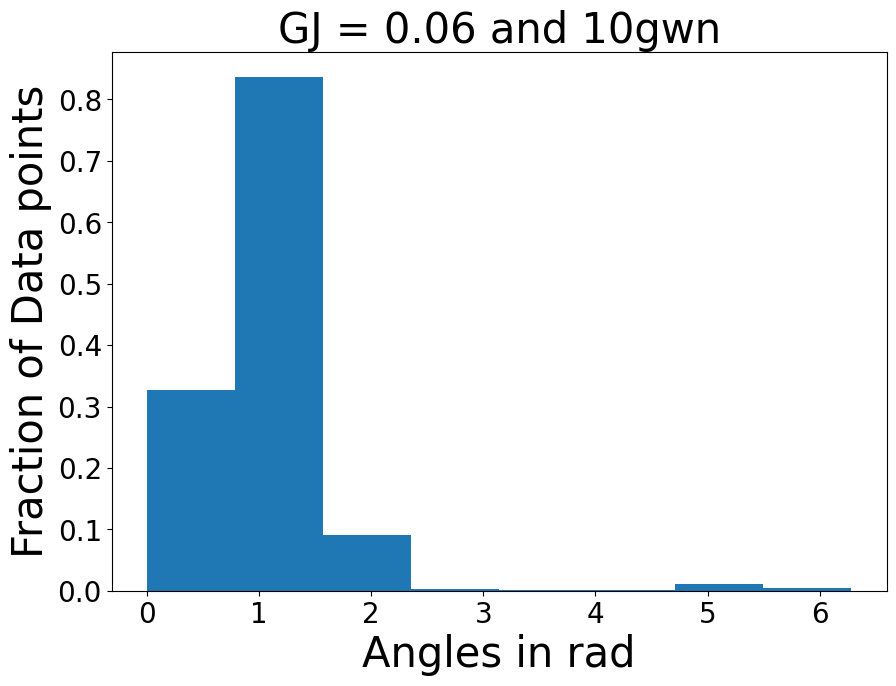

In [156]:
# Creating dataset
a = theta
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi],density = True)
plt.title("GJ = 0.06 and 10gwn", fontsize = 30)
plt.xlabel("Angles in rad", fontsize = 30)
plt.ylabel("Fraction of Data points", fontsize = 30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# Show plot
plt.show()

In [52]:
#now that we have the difference, we can convert this into their e^ix form
#this can be done in two ways given e^ix=icosx+sinx
i=0

z=np.zeros(len(phase[0]), dtype=complex)
while i<len(phase[0]):
    z[i]=complex(0,phase[0][i]-phase[1][i])
    
    i+=1
z

array([0.+1.25325004j, 0.+1.16867842j, 0.+1.16869898j, ...,
       0.+0.87239016j, 0.+0.87243116j, 0.+0.99269255j])

In [53]:
#z is basically the ix of the e^ix
euler = np.exp(z) #gives an e^ix array
sums = sum(euler)
sync = abs(sums/(len(euler)))
real = sum(np.sin(phase[0]-phase[1]))
imag = sum(np.cos(phase[0]-phase[1]))
sync2 = np.sqrt(real**2 + imag**2)/len(euler)
sync, sync2

(0.07209967268828807, 0.07209967268828808)

In [61]:
phase1 = phase[0]
phase2 = phase[1]
sync = np.zeros(len(phase[0]))
r = np.zeros(len(phase[1]), dtype = complex)
i=0
while i<len(phase1):
    phase_diff=phase1[i]-phase2[i]
    if (phase_diff>np.pi):
        sync[i] = phase_diff - 2*np.pi
    elif (phase_diff<-np.pi):
        sync[i] = phase_diff + 2*np.pi
    else:
        sync[i]=phase_diff
    r[i] =complex(0,sync[i])
    i+=1

R=abs(np.sum(np.exp(r)))/len(r)

In [62]:
R

0.8839710711726988

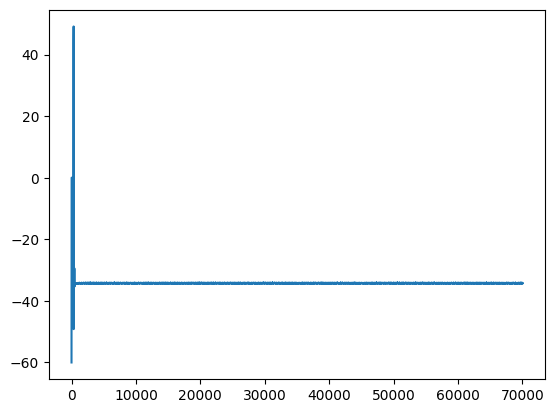

In [29]:
plt.plot(t,V2)

In [158]:
4/1.4

2.857142857142857

In [159]:
65*12

780